# CLEANING

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import random as rd
import seaborn as sns
%matplotlib inline

In [2]:
with open("openfoodfactsproducts.csv","r", encoding="utf8")as f1:
    with open("mini.csv","w", encoding="utf8") as f2:
        for i in range(10000):
            line=f1.readline()    
            f2.write(line)

In [3]:
df=pd.read_csv("mini.csv", sep="\t", na_values="NaN")


C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,13,27,28,29,31,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(9999, 184)

Je fais une description du dataset pour avoir une vision d'ensemble:

In [5]:
df.describe()

,created_t,last_modified_t,abbreviated_product_name,cities,allergens_en,serving_quantity,no_nutriments,additives_n,additives,ingredients_from_palm_oil_n,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,9.999000e+03,9.999000e+03,0.0,0.0,0.0,6828.000000,0.0,7229.000000,0.0,7229.000000,...,23.000000,5038.000000,0.0,0.0,0.0,0.0,61.000000,0.0,0.0,0.0
mean,1.533382e+09,1.580698e+09,NaN,NaN,NaN,77.026943,NaN,3.089639,NaN,0.003873,...,619.469565,9.935887,NaN,NaN,NaN,NaN,0.000017,NaN,NaN,NaN
std,4.993390e+07,2.685472e+07,NaN,NaN,NaN,85.392142,NaN,4.151561,NaN,0.062119,...,734.270308,9.653931,NaN,NaN,NaN,NaN,0.000018,NaN,NaN,NaN
min,1.345024e+09,1.419618e+09,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,0.000000,...,78.760000,-14.000000,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN
25%,1.489069e+09,1.583821e+09,NaN,NaN,NaN,28.000000,NaN,0.000000,NaN,0.000000,...,194.325000,1.000000,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN
50%,1.518969e+09,1.587589e+09,NaN,NaN,NaN,40.000000,NaN,2.000000,NaN,0.000000,...,475.790000,11.000000,NaN,NaN,NaN,NaN,0.000006,NaN,NaN,NaN
75%,1.587648e+09,1.587668e+09,NaN,NaN,NaN,100.000000,NaN,5.000000,NaN,0.000000,...,660.745000,18.000000,NaN,NaN,NaN,NaN,0.000018,NaN,NaN,NaN
max,1.617218e+09,1.617219e+09,NaN,NaN,NaN,1077.281879,NaN,33.000000,NaN,1.000000,...,3580.000000,36.000000,NaN,NaN,NaN,NaN,0.000077,NaN,NaN,NaN


### Affichage des colonnes

In [6]:
pd.DataFrame(df.columns).sort_values(0, ascending=False).head(60)

,0
156,zinc_100g
178,water-hardness_100g
141,vitamin-pp_100g
137,vitamin-k_100g
136,vitamin-e_100g
135,vitamin-d_100g
138,vitamin-c_100g
143,vitamin-b9_100g
142,vitamin-b6_100g
140,vitamin-b2_100g


### Suppression des colonnes aux valeurs nulles/quasi-nulles

In [7]:
df.dropna(axis="columns", thresh=100, inplace=True)
df.shape
pd.DataFrame(np.sort(df.columns))

,0
0,additives_en
1,additives_n
2,additives_tags
3,allergens
4,brand_owner
...,...
83,vitamin-b6_100g
84,vitamin-c_100g
85,vitamin-d_100g
86,vitamin-pp_100g


In [8]:
df.shape

(9999, 88)

### Idée d'application
L'idée d'application est de comparer la qualité des contributeurs selon différents critères nutritionnels.

### Repérage des colonnes exploitables

In [9]:
#j'identifie les différentes colonnes
df["nutriscore_grade"].unique()

array([nan, 'd', 'b', 'a', 'c', 'e'], dtype=object)

In [10]:
df["creator"].value_counts().sort_values(ascending=False)


usda-ndb-import               4443
kiliweb                       2163
org-database-usda             1824
openfoodfacts-contributors     611
inf                            141
                              ... 
titgugu                          1
yogigirl                         1
foodtime                         1
semperverus                      1
aleene                           1
Name: creator, Length: 152, dtype: int64

### Detection et suppression des valeurs abbérantes

In [11]:
df[["energy-kcal_100g","energy_100g","carbohydrates_100g","proteins_100g","nutriscore_grade","nutriscore_score","fat_100g"]].describe()

,energy-kcal_100g,energy_100g,carbohydrates_100g,proteins_100g,nutriscore_score,fat_100g
count,8587.000000,8644.000000,8599.000000,8599.000000,5038.000000,8585.000000
mean,284.896280,1191.589160,32.761491,7.403634,9.935887,13.733238
std,206.923572,865.045922,28.014195,10.013264,9.653931,18.070997
min,0.000000,0.000000,0.000000,0.000000,-14.000000,0.000000
25%,96.484850,402.000000,6.898300,0.800000,1.000000,0.000000
50%,286.000000,1197.000000,25.000000,4.800000,11.000000,5.710000
75%,417.000000,1745.000000,56.615000,9.725000,18.000000,21.430000
max,2674.000000,11188.000000,222.000000,100.000000,36.000000,222.000000


In [12]:
#df["energy-kcal_100g"]=df["energy-kcal_100g"].apply(lambda v: v if 0<v<910 else np.nan)
#df["energy_100g"]=df["energy_100g"].apply(lambda v: v if 0<v<3800 else np.nan)

df.where((df["energy_100g"]<3600) & (df["energy_100g"]>0), np.nan,inplace=True)


df["energy-kcal_100g"].where(~(df["energy-kcal_100g"].isnull()),df["energy_100g"] / 4.20,inplace=True) 
df["energy-kcal_100g"].fillna(df["energy_100g"] / 4.20,inplace=True)

In [13]:
df["nutriscore_grade"].value_counts()

d    1447
e    1183
c     937
a     913
b     500
Name: nutriscore_grade, dtype: int64

# ANALYSE EXPLORATOIRE DE DONNEES

### Mesure de dispersion

# Analyse univariée de l'énergie : moyenne, percentiles, skewness, kurtosis, modes


In [14]:
dfc=df.copy()
dfc=dfc[["creator","energy_100g"]]
nutriscore_numbers=df["nutriscore_grade"].copy()
nutriscore_numbers=nutriscore_numbers.dropna()
dfc.insert(1,"nutriscore_numbers",nutriscore_numbers)
dfc["nutriscore_numbers"]=dfc["nutriscore_numbers"].replace({
    "a":5,
    "b":4,
    "c":3,
    "d":2,
    "e":1
})
dfc

,creator,nutriscore_numbers,energy_100g
0,kiliweb,NaN,1569.0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,del51,2.0,936.0
4,NaN,NaN,NaN
...,...,...,...
9994,NaN,NaN,NaN
9995,usda-ndb-import,3.0,523.0
9996,usda-ndb-import,5.0,75.0
9997,usda-ndb-import,5.0,75.0


La moyenne énergétique est:
 1231.8834330373434
La valeur médiane est:
 1255.0
La valeur modale est:
 0    1494.0
dtype: float64
La variation:
 623573.4881522843
L'écart-type:
 789.6666943415331
le skewness empirique est égal à 0.26, ce qui indique que la distribution est légèrement décalée à droite
le kurtosis empirique est égal à -0.77, ce qui indique que la distribution est plutôt aplatie, et que les observations sont moins concentrées


<AxesSubplot:>

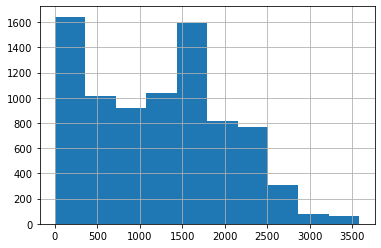

In [15]:
print("La moyenne énergétique est:\n",dfc["energy_100g"].mean())
print("La valeur médiane est:\n",dfc["energy_100g"].median())
print("La valeur modale est:\n",dfc["energy_100g"].mode())
print("La variation:\n",dfc["energy_100g"].var(ddof=0))
print("L'écart-type:\n",dfc["energy_100g"].std(ddof=0))
print("le skewness empirique est égal à {}, ce qui indique que la distribution est légèrement décalée à droite".format(dfc["energy_100g"].skew().round(2)))
print("le kurtosis empirique est égal à {}, ce qui indique que la distribution est plutôt aplatie, et que les observations sont moins concentrées".format(dfc["energy_100g"].kurt().round(2)))
dfc["energy_100g"].hist()

In [16]:

nutriscore_numbers=df["nutriscore_grade"].copy()
nutriscore_numbers=nutriscore_numbers.replace({
    "a"==5,
    "b"==4,
    "c"==3,
    "d"==2,
    "e"==1
})
nutriscore_numbers=nutriscore_numbers.dropna()

In [17]:
dfc["creator"]=dfc[dfc["creator"].isin(["usda-ndb-import","kiliweb","org-database-usda","openfoodfacts-contributors"])]

<AxesSubplot:ylabel='creator'>

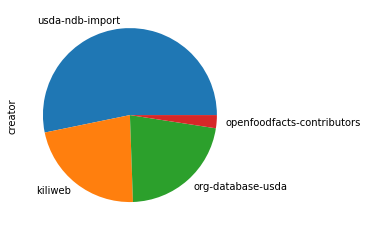

In [18]:
dfc["creator"].value_counts().plot.pie()

Les organisations gouvernementales (org,usda) paraissent être les contributeurs les plus généreux; vu la source je pars du principes que les données sont fiables; c'est donc également l'occasion de tester la fiabilité des informations fournies par les 2 autres contributeurs particuliers en les comparant tous les 4.

In [19]:
dfc["nutriscore_numbers"].dropna(how=any)
pd.pivot_table(dfc, index="creator", values="nutriscore_numbers").sort_values(by="nutriscore_numbers",ascending=False)

,nutriscore_numbers
creator,
kiliweb,2.794621
usda-ndb-import,2.705106
openfoodfacts-contributors,2.685185
org-database-usda,2.612500


In [20]:
dfc=dfc.dropna(axis=0, how="any")

In [21]:
usda=dfc[dfc["creator"]=="usda-ndb-import"]["nutriscore_numbers"]
openfoodfacts=dfc[dfc["creator"]=="openfoodfacts-contributors"]["nutriscore_numbers"]
kiliweb=dfc[dfc["creator"]=="kiliweb"]["nutriscore_numbers"]
org=dfc[dfc["creator"]=="org-database-usda"]["nutriscore_numbers"]
df_createur=pd.DataFrame(data=dfc[["energy_100g","creator"]])

Voici la distribution des aliments de la base de données en fonction de leur apport énergétique:

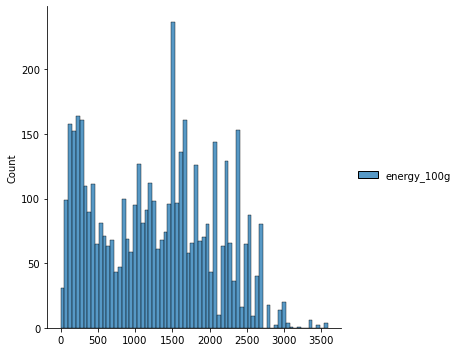

In [22]:
sns.displot(df_createur,bins=70)

Nous pouvons voir que la distribution est plutôt centrée à gauche, avec des valeurs peu nombreuses dépassant les 2700kcal.

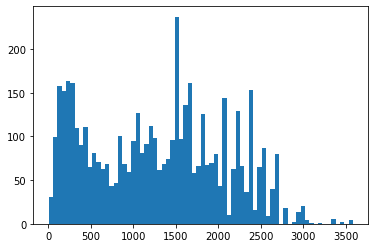

In [23]:
plt.hist(dfc["energy_100g"],bins=70)
plt.show()

Affichons maintenant la distribution énergétique moyenne des aliments pour chaque nutriscore et chacun des 4 principauux contributeurs:

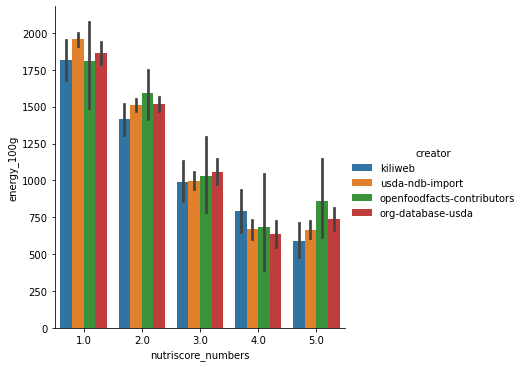

In [24]:
sns.catplot(data=dfc, kind="bar", x="nutriscore_numbers",y="energy_100g", hue="creator")

A première vue, les moyennes sont plutôt homogènes pour les 4 contributeurs. De plus, nous pouvons dire que plus le nutriscore se dégrade plus la valeur calorique est importante. L'apport calorique est donc inversement proportionnel au grade nutritionnel de l'aliment. 

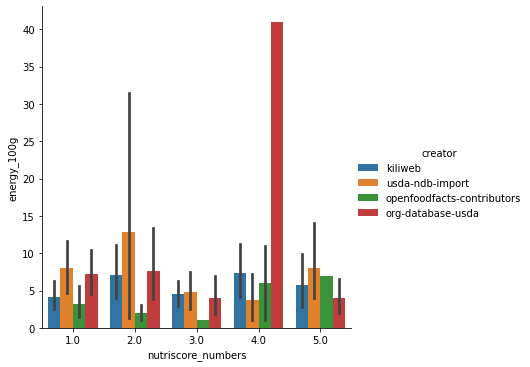

In [25]:
sns.catplot(data=dfc, kind="bar", x="nutriscore_numbers",y=dfc["energy_100g"].value_counts(), hue="creator")

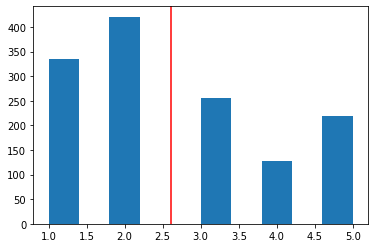

In [26]:
plt.hist(org)
mean=org.mean()
plt.axvline(mean, color="r")

(array([23.,  0., 33.,  0.,  0., 24.,  0., 11.,  0., 17.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

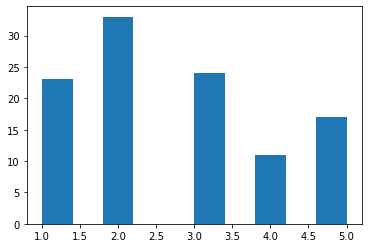

In [27]:
plt.hist(openfoodfacts)

### Répartition des aliments selon le nutriscore

Je veux avoir une petite idée sur la répartition globale des valeur selon le nutriscore :

<AxesSubplot:ylabel='nutriscore_numbers'>

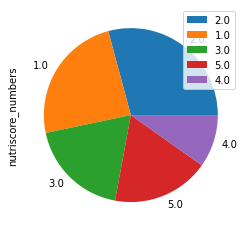

In [28]:
dfc["nutriscore_numbers"].value_counts().plot.pie(legend=True)

### Distribution du nutriscore selon le contributeur

In [29]:
pd.pivot_table(dfc, index="creator", values="nutriscore_numbers")

,nutriscore_numbers
creator,
kiliweb,2.794621
openfoodfacts-contributors,2.685185
org-database-usda,2.612500
usda-ndb-import,2.705106


### Répatition des aliments selon l'apport calorique:

In [30]:
df_copy=df.copy()
_0_1000=[]
_1000_2000=[]
_2000_end=[]
for s in df_copy["energy_100g"]:
    if 0<s<=1000:
        _0_1000.append(s)
    elif 1000<s<=2000:
        _1000_2000.append(s)
    else:
        _2000_end.append(s)

pie=[len(_0_1000),len(_1000_2000),len(_2000_end)]
pie=pd.DataFrame(pie, columns=["numbers"], index=["from "+str(x)+"000 to "+str(x+1)+"000 kcal" for x in range(0, len(pie))])   
pie

,numbers
from 0000 to 1000 kcal,3327
from 1000 to 2000 kcal,3379
from 2000 to 3000 kcal,3293


Nous pouvons voir que la répartition énergétique des aliments est égale. 

In [31]:
df2=dfc[["creator","energy_100g"]].copy()
df2.dropna(axis=0, how="any")
df2["creator"].value_counts().sort_values(ascending=False)

usda-ndb-import               2879
org-database-usda             1360
kiliweb                        409
openfoodfacts-contributors     108
Name: creator, dtype: int64

Les contributeurs de l'usda, qui sont les plus prolifiques en matière d'information concernant l'énergie, présentent également des moyennes d'énergie en kj pour 100g très similaires. On en déduit donc que les 2 contributeurs particuliers présentent également des données fiables prêtes à être utilisées.

In [32]:
subset=pd.pivot_table(dfc, index="creator")
creator_sum=df["creator"].copy().value_counts()
subset.insert(2,"creator_sum",creator_sum)
subset.sort_values(by="creator_sum",ascending=False)

,energy_100g,nutriscore_numbers,creator_sum
creator,,,
usda-ndb-import,1286.193470,2.705106,4179
kiliweb,1174.728753,2.794621,1754
org-database-usda,1309.034559,2.612500,1728
openfoodfacts-contributors,1306.259259,2.685185,191


On analyse la dispersion des valeurs d'énergy pour les différents produits mis en ligne par les 4 contributeurs les plus prolifiques de la base de données:

<AxesSubplot:xlabel='creator', ylabel='energy_100g'>

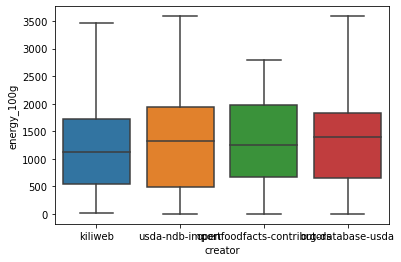

In [33]:
sns.boxplot(x=df2["creator"],y=df2["energy_100g"])

In [34]:
dfc[["nutriscore_numbers","energy_100g"]].corr()

,nutriscore_numbers,energy_100g
nutriscore_numbers,1.000000,-0.584708
energy_100g,-0.584708,1.000000


### Etude des correlations entre le score nutritif et l'apport énergétique des produits.

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df3=dfc.copy()
df3.insert(1,"nutrition-score-fr_100g",df["nutrition-score-fr_100g"])
df3.dropna(axis=0, how="any")


,creator,nutrition-score-fr_100g,nutriscore_numbers,energy_100g
14,kiliweb,1.0,4.0,134.0
23,kiliweb,14.0,2.0,1594.0
33,kiliweb,-2.0,5.0,657.0
37,kiliweb,1.0,4.0,598.0
62,kiliweb,14.0,2.0,1661.0
...,...,...,...,...
9993,usda-ndb-import,7.0,3.0,2389.0
9995,usda-ndb-import,5.0,3.0,523.0
9996,usda-ndb-import,-1.0,5.0,75.0
9997,usda-ndb-import,-1.0,5.0,75.0


### Regression linéraire pour 2 variables quantitatives

In [37]:
import statsmodels.api as sm
sm.OLS(df3["nutrition-score-fr_100g"], df3["energy_100g"]).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     nutrition-score-fr_100g   R-squared (uncentered):                   0.724
Model:                                 OLS   Adj. R-squared (uncentered):              0.724
Method:                      Least Squares   F-statistic:                          1.250e+04
Date:                     Sun, 21 Nov 2021   Prob (F-statistic):                        0.00
Time:                             18:13:41   Log-Likelihood:                         -16226.
No. Observations:                     4756   AIC:                                  3.245e+04
Df Residuals:                         4755   BIC:                                  3.246e+04
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
energy_100g     0.0079   7.06e-05    111.806      0.000       0.008       0.008
==============================================================================
Omnibus:                      268.315   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              316.954
Skew:                          -0.597   Prob(JB):                     1.49e-69
Kurtosis:                       3.418   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

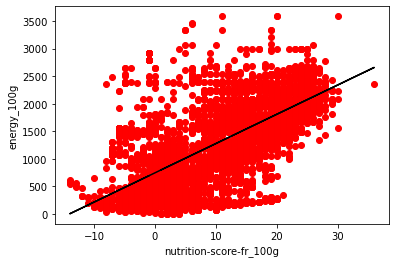

In [38]:
from sklearn.linear_model import LinearRegression

df3.plot(kind="scatter", x="nutrition-score-fr_100g", y="energy_100g")
plt.scatter(df3["nutrition-score-fr_100g"], df3["energy_100g"],label="rien", color='r')

X = df3["nutrition-score-fr_100g"].values.reshape(-1,1)
y = df3["energy_100g"].values
reg=LinearRegression()
reg.fit(X,y)
y_pred=reg.predict(X)
plt.plot(X,y_pred, color='k')



In [39]:
df3.corr().round(2)

,nutrition-score-fr_100g,nutriscore_numbers,energy_100g
nutrition-score-fr_100g,1.00,-0.96,0.65
nutriscore_numbers,-0.96,1.00,-0.58
energy_100g,0.65,-0.58,1.00


Après avoir effectué la regression linéaire en ayant préalablement , nous pouvons clairement voir que la valeur énergétique d'un aliment est proportionnelle au score nutritionnel français. Il ressort une valeur d'environ 0,65 lors de l'estimation de la corrélation, ce qui appuie le résultat obtenu par la regression linéaire.

### Mesure de la correlation entre l'apport calorique et les contributeurs par ANOVA

In [40]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod=ols("energy_100g ~ creator",data=df2).fit()
aov_table=sm.stats.anova_lm(mod, typ=2)
pd.DataFrame(aov_table)

,sum_sq,df,F,PR(>F)
creator,5.802479e+06,3.0,3.123847,0.024831
Residual,2.942246e+09,4752.0,NaN,NaN


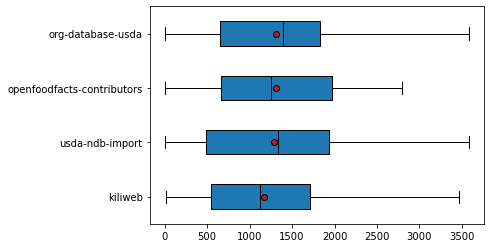

In [41]:
X = "creator" # qualitative
Y = "energy_100g" # quantitative

#sous_echantillon = df2["creator"]
liste=[]
df2["creator"].dropna()
createurs=df2["creator"].unique()
for x in createurs:
    liste.append(df2[df2["creator"]==x][Y])

    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(liste, labels=createurs, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

### Analyse de l'énergie en fct des 4 principaux contributeurs par ANOVA:  

In [42]:
import pingouin as pg
aov=pg.anova(dv="energy_100g", between="creator",data=df2, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,creator,5.802479e+06,3,1.934160e+06,3.123847,0.024831,0.001968
1,Within,2.942246e+09,4752,6.191596e+05,NaN,NaN,NaN


C:\Users\DELL\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.12, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Les mesures p et np2 sont très faibles, nous pouvons en déduire que la différence entre les différents createurs est insignifiante, ce qui confirme encore une fois nos précédents résultats.

Afin que la mesure de corrélation en soit pas biaisée par certains contributeurs mais en même temps ne se concentre pas seulement sur 4 contributeurs, nous nous concentrerons sur les contributeurs ayant à leur actif au moins 100 contributions. Je modifie donc la colonne ["creator"] du dataframe:

### ACP

Je cherche à faire une ACP pour déterminer quelles composantes peuvent maximiser mon inertie :

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn import preprocessing

Je cherche à faire une ACP pour concernant les valeurs numériques. Je cherche par exemple à trouver toutes les colonnes qui contiennent un taux pour 100g:

In [49]:
colonnes_exploitables= [col for col in df.columns if "100" in col]
print(colonnes_exploitables)


['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'folates_100g', 'vitamin-b12_100g', 'pantothenic-acid_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'nutrition-score-fr_100g']


Je filtre les colonnes selon un taux de remplissage de minimum 30% afin de ne pas avoir à remplir les valeurs manquantes par une d'autres valeurs (ne pas biaiser l'ACP). 

In [50]:
df_pca=df[['energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'folates_100g', 'vitamin-b12_100g', 'pantothenic-acid_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'nutrition-score-fr_100g']]
df_pca=df_pca.dropna(axis=1,thresh=3000)
df_pca.shape

(9999, 17)

Il reste 17 colonnes après filtrage. Pour être en capacité de faire une PCA je ne dois pas avoir de valeurs manquantes. A défaut d'utiliser fillna() pour remplacer les valeurs manquantes par d'autres valeurs(mean, mode, valeur la plus fréquente)qui pourraient biaiser l'ACP, je choisis de supprimer toutes les lignes comportant des valeurs manquantes:

In [51]:
df_pca=df_pca.dropna(axis=0,thresh=17)
df_pca.isna().sum()
df_pca.shape

(3488, 17)

Toutes les lignes sont pleines; je vais donc pouvoir réaliser une ACP avec 17 variables. 

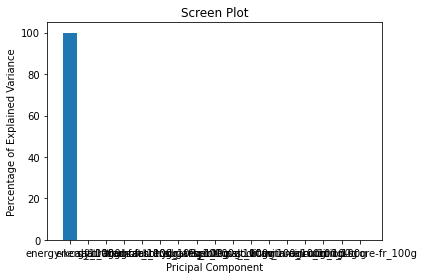

In [52]:
scaler=preprocessing.scale(df_pca.T)
pca=PCA()
pca=pca.fit(df_pca)
pca_data=pca.transform(df_pca)
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=df_pca.columns
data_var=pd.DataFrame(per_var, index=labels)
plt.bar(x=df_pca.columns, height=per_var, tick_label=labels)
plt.xlabel("Pricipal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Screen Plot")
plt.show()


In [53]:
per_var[0]

99.9

Je retire donc les colonnes  'energy-kcal_100g', 'energy_100g' car l'ACP n'est d'aucune utilité. Je retire également 'saturated-fat_100g', 'monounsaturated-fat_100g', 'polyunsaturated-fat_100g', 'trans-fat_100g' car les matières grasses sont déjà representées par "fat_100g" 

In [54]:
df_pca_2=df[['fat_100g', 'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'vitamin-a_100g', 'vitamin-d_100g', 'vitamin-c_100g', 'vitamin-b1_100g', 'vitamin-b2_100g', 'vitamin-pp_100g', 'vitamin-b6_100g', 'folates_100g', 'vitamin-b12_100g', 'pantothenic-acid_100g', 'potassium_100g', 'calcium_100g', 'phosphorus_100g', 'iron_100g', 'magnesium_100g', 'zinc_100g', 'nutrition-score-fr_100g']].copy()
df_pca_2=df_pca_2.dropna(axis=1,thresh=3000)
df_pca_2.shape

(9999, 12)

In [55]:
df_pca_2=df_pca_2.dropna(axis=0,thresh=12)
df_pca_2.isna().sum()

fat_100g                   0
cholesterol_100g           0
carbohydrates_100g         0
sugars_100g                0
fiber_100g                 0
proteins_100g              0
salt_100g                  0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
nutrition-score-fr_100g    0
dtype: int64

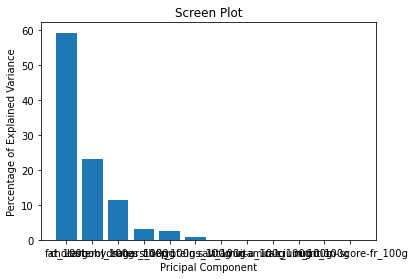

In [56]:
scaler=preprocessing.scale(df_pca_2.T)
pca=PCA()
pca=pca.fit(df_pca_2)
pca_data=pca.transform(df_pca_2)
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=df_pca_2.columns
data_var=pd.DataFrame(per_var, index=labels)
plt.bar(x=df_pca_2.columns, height=per_var, tick_label=labels)
plt.xlabel("Pricipal Component")
plt.ylabel("Percentage of Explained Variance")
plt.title("Screen Plot")
plt.show()


In [57]:
for x in labels:
    print(x)

fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
vitamin-a_100g
vitamin-c_100g
calcium_100g
iron_100g
nutrition-score-fr_100g


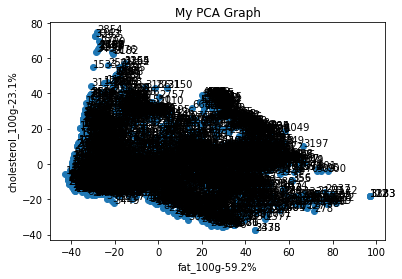

In [58]:
pca_df=pd.DataFrame(pca_data, columns=labels)
plt.scatter(pca_df["fat_100g"], pca_df["cholesterol_100g"])
plt.title("My PCA Graph")
plt.xlabel("fat_100g-{}%".format(per_var[0]))
plt.ylabel("cholesterol_100g-{}%".format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df["fat_100g"].loc[sample],pca_df["cholesterol_100g"].loc[sample]))

plt.show()

<AxesSubplot:xlabel='saturated-fat_100g', ylabel='nutrition-score-fr_100g'>

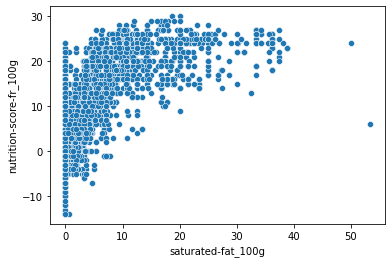

In [59]:
sns.scatterplot(y="nutrition-score-fr_100g", x="saturated-fat_100g",  data=df_pca)

In [60]:
mask=df["creator"].isin(["usda-ndb-import","kiliweb","org-database-usda","openfoodfacts-contributors"])

In [62]:
df["other_creators"]=df["creator"].where(mask==False).dropna(how="all")

### Comparaison des deux différents types de contributeurs: 

Afin de généraliser mon analyse, je cherche à comparer la qualité des contributions de deux classes de contributeurs. La première regroupe les 4 contributeurs les plus prolifiques(prin_crea), dont deux sont rattachés à une agence gouvernementale, et la seconde regroupe les autres contributeurs qui ont participé modestement dans cette database (other_crea). 

In [63]:
prin_crea=df[['creator', 'nutrition-score-fr_100g','energy_100g']].where(df["creator"].isin(["usda-ndb-import","kiliweb","org-database-usda","openfoodfacts-contributors"]))
other_crea=df[['creator', 'nutrition-score-fr_100g','energy_100g']].where(~df["creator"].isin(["usda-ndb-import","kiliweb","org-database-usda","openfoodfacts-contributors"]))

In [64]:
prin_crea.dropna(axis=0,inplace=True)
other_crea.dropna(axis=0,inplace=True)

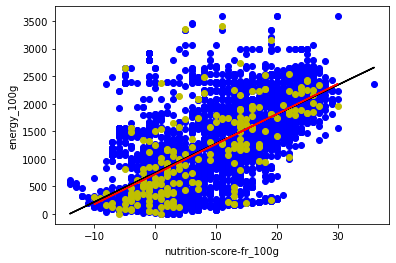

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression

df.plot(kind="scatter", x="nutrition-score-fr_100g", y="energy_100g")
plt.scatter(prin_crea["nutrition-score-fr_100g"], prin_crea["energy_100g"],label="rien", color='b')
plt.scatter(other_crea["nutrition-score-fr_100g"], other_crea["energy_100g"],label="rien", color='y')

X_prin = prin_crea["nutrition-score-fr_100g"].values.reshape(-1,1)
y_prin = prin_crea["energy_100g"].values
X_other=other_crea["nutrition-score-fr_100g"].values.reshape(-1,1)
y_other=other_crea["energy_100g"].values
reg1=LinearRegression()
reg2=LinearRegression()
reg1.fit(X_prin,y_prin)
reg2.fit(X_other,y_other)
y_prin_pred=reg1.predict(X_prin)
y_other_pred=reg2.predict(X_other)
plt.plot(X_prin,y_prin_pred, color='k')
plt.plot(X_other,y_other_pred, color='r')


Pour pousser l'analyse plus loin, je veux maintenant choisir au hasard un contributeur parmi "les autres", c'est-à-dire appartenant à la seconde catégorie pour l'évaluer individuellement. 

#### Cas pratique avec un contributeur tiers en comparaison avec les contributeurs principaux.

In [66]:
other_crea["creator"].value_counts()

tacinte          19
teolemon         18
waistline-app    14
neuni            12
stephane          9
                 ..
jrom              1
freezed           1
nad6814           1
rednut            1
lucaa             1
Name: creator, Length: 78, dtype: int64

Je choisis "tacinte" et je décide de comparer ses contributions avec celles des contributeurs gouvernementaux tels que l'USDA:

In [67]:
tacinte=other_crea.where(other_crea["creator"]=="tacinte")
tacinte.dropna(axis=0, how="all",inplace=True)
tacinte

,creator,nutrition-score-fr_100g,energy_100g
563,tacinte,11.0,1284.0
564,tacinte,11.0,1284.0
1643,tacinte,9.0,975.0
2164,tacinte,12.0,1070.0
2342,tacinte,-2.0,615.0
2356,tacinte,7.0,561.0
2398,tacinte,2.0,761.0
2514,tacinte,0.0,42.0
2709,tacinte,0.0,332.0
2796,tacinte,0.0,862.0


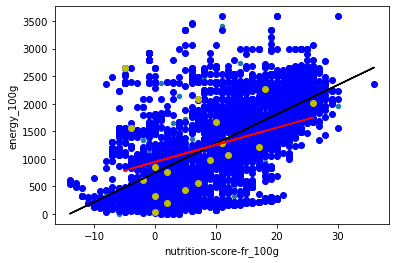

In [68]:
import numpy as np
from sklearn.linear_model import LinearRegression

df.plot(kind="scatter", x="nutrition-score-fr_100g", y="energy_100g")
plt.scatter(prin_crea["nutrition-score-fr_100g"], prin_crea["energy_100g"],label="rien", color='b')
plt.scatter(tacinte["nutrition-score-fr_100g"], tacinte["energy_100g"],label="rien", color='y')

X_prin = prin_crea["nutrition-score-fr_100g"].values.reshape(-1,1)
y_prin = prin_crea["energy_100g"].values
X_tacinte=tacinte["nutrition-score-fr_100g"].values.reshape(-1,1)
y_tacinte=tacinte["energy_100g"].values
reg1=LinearRegression()
reg2=LinearRegression()
reg1.fit(X_prin,y_prin)
reg2.fit(X_tacinte,y_tacinte)
y_prin_pred=reg1.predict(X_prin)
y_tacinte_pred=reg2.predict(X_tacinte)
plt.plot(X_prin,y_prin_pred, color='k')
plt.plot(X_tacinte,y_tacinte_pred, color='r')